In [1]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.transforms import Bbox, TransformedBbox, blended_transform_factory
from mpl_toolkits.axes_grid1.inset_locator import (
    BboxConnector,
    BboxConnectorPatch,
    BboxPatch,
)

df = pd.read_csv("SP_user_studies.csv", sep=",", thousands=",")
df.head()

,#,paper,Feedback Type,Participants,Time (h),Days,Study Type,Task Category,Task,Measures
0,1,daian2007sensitive,VIS + AU,6.0,6.0,1,in-situ,PC Tasks,participants' own work,"posture behaviour (sitting time,time in good p..."
1,2,sigurdsson2008using,Visual,8.0,24.0,1,lab,PC Tasks,typing task,"posture behaviour(time in good posture,subject..."
2,3,ishimatsu2014bitaika,Visual,8.0,1.0,1,lab,PC Tasks,participants' own work,"posture behaviour (time in bad posture, number..."
3,4,ishimatsu2015finding,VIS vs. VIS + AC,12.0,1.0,2,lab,PC Tasks,participants' own work,posture behaviour (time in bad posture)
4,5,haller2011finding,VIS vs. VIS vs. VIB,12.0,1.5,1,lab,PC Tasks,"typing task, reading task",posture behaviour (frequency of posture types)...


In [2]:
print(
    "Number of studies                       : ",
    len(df[["#", "Participants", "Time (h)", "Days"]]),
)
print(
    "Number of studies without missing values: ",
    len(df[["#", "Participants", "Time (h)", "Days"]].dropna()),
)

Number of studies                       :  64
Number of studies without missing values:  59


In [3]:
df1 = df[["#", "Participants", "Time (h)", "Days"]].dropna()

df1.head()

,#,Participants,Time (h),Days
0,1,6.0,6.0,1
1,2,8.0,24.0,1
2,3,8.0,1.0,1
3,4,12.0,1.0,2
4,5,12.0,1.5,1


In [4]:
# Code adapted from https://matplotlib.org/stable/gallery/subplots_axes_and_figures/axes_zoom_effect.html


def connect_bbox(
    bbox1, bbox2, loc1a, loc2a, loc1b, loc2b, prop_lines, prop_patches=None
):
    if prop_patches is None:
        prop_patches = prop_lines.copy()
        prop_patches["alpha"] = prop_patches.get("alpha", 1) * 0.2

    prop_lines["alpha"] = 0.5
    prop_lines["zorder"] = 0
    prop_lines["color"] = "#77AADD"

    c1 = BboxConnector(bbox1, bbox2, loc1=loc1a, loc2=loc2a, **prop_lines)
    c1.set_clip_on(False)
    c2 = BboxConnector(bbox1, bbox2, loc1=loc1b, loc2=loc2b, **prop_lines)
    c2.set_clip_on(False)

    prop_patches["color"] = "#77AADD"
    bbox_patch1 = BboxPatch(bbox1, **prop_patches)
    bbox_patch2 = BboxPatch(bbox2, **prop_patches)
    prop_patches["alpha"] = 0

    p = BboxConnectorPatch(
        bbox1, bbox2, loc1a=loc1a, loc2a=loc2a, loc1b=loc1b, loc2b=loc2b, **prop_patches
    )
    p.set_clip_on(False)

    return c1, c2, bbox_patch1, bbox_patch2, p


def zoom_effect01(ax1, ax2, xmin, xmax, **kwargs):
    """
    ax1 : the main axes
    ax1 : the zoomed axes
    (xmin,xmax) : the limits of the colored area in both plot axes.

    connect ax1 & ax2. The x-range of (xmin, xmax) in both axes will
    be marked.  The keywords parameters will be used to create
    patches.

    """

    trans1 = blended_transform_factory(ax1.transData, ax1.transAxes)
    trans2 = blended_transform_factory(ax2.transData, ax2.transAxes)

    bbox = Bbox.from_extents(xmin, 0, xmax, 1)

    mybbox1 = TransformedBbox(bbox, trans1)
    mybbox2 = TransformedBbox(bbox, trans2)

    prop_patches = kwargs.copy()
    prop_patches["ec"] = "none"
    prop_patches["alpha"] = 0.2

    c1, c2, bbox_patch1, bbox_patch2, p = connect_bbox(
        mybbox1,
        mybbox2,
        loc1a=3,
        loc2a=2,
        loc1b=4,
        loc2b=1,
        prop_lines=kwargs,
        prop_patches=prop_patches,
    )

    ax1.add_patch(bbox_patch1)
    ax2.add_patch(c1)
    ax2.add_patch(c2)
    ax2.add_patch(p)

    return c1, c2, bbox_patch1, bbox_patch2, p

Counter({45.0: 1, 50.0: 1, 53.0: 1})
p_outliers_to_jitter
[]
p_indices_to_jitter
t_outliers_to_jitter
[  96.  168.  672. 1008.]
t_indices_to_jitter
[1 6]
[8 9]
[3 7]
[ 5 11 13]
['0', '\n27', '96', '\n120', '168', '336', '\n360', '\n672', '1008', '2016', '2880']


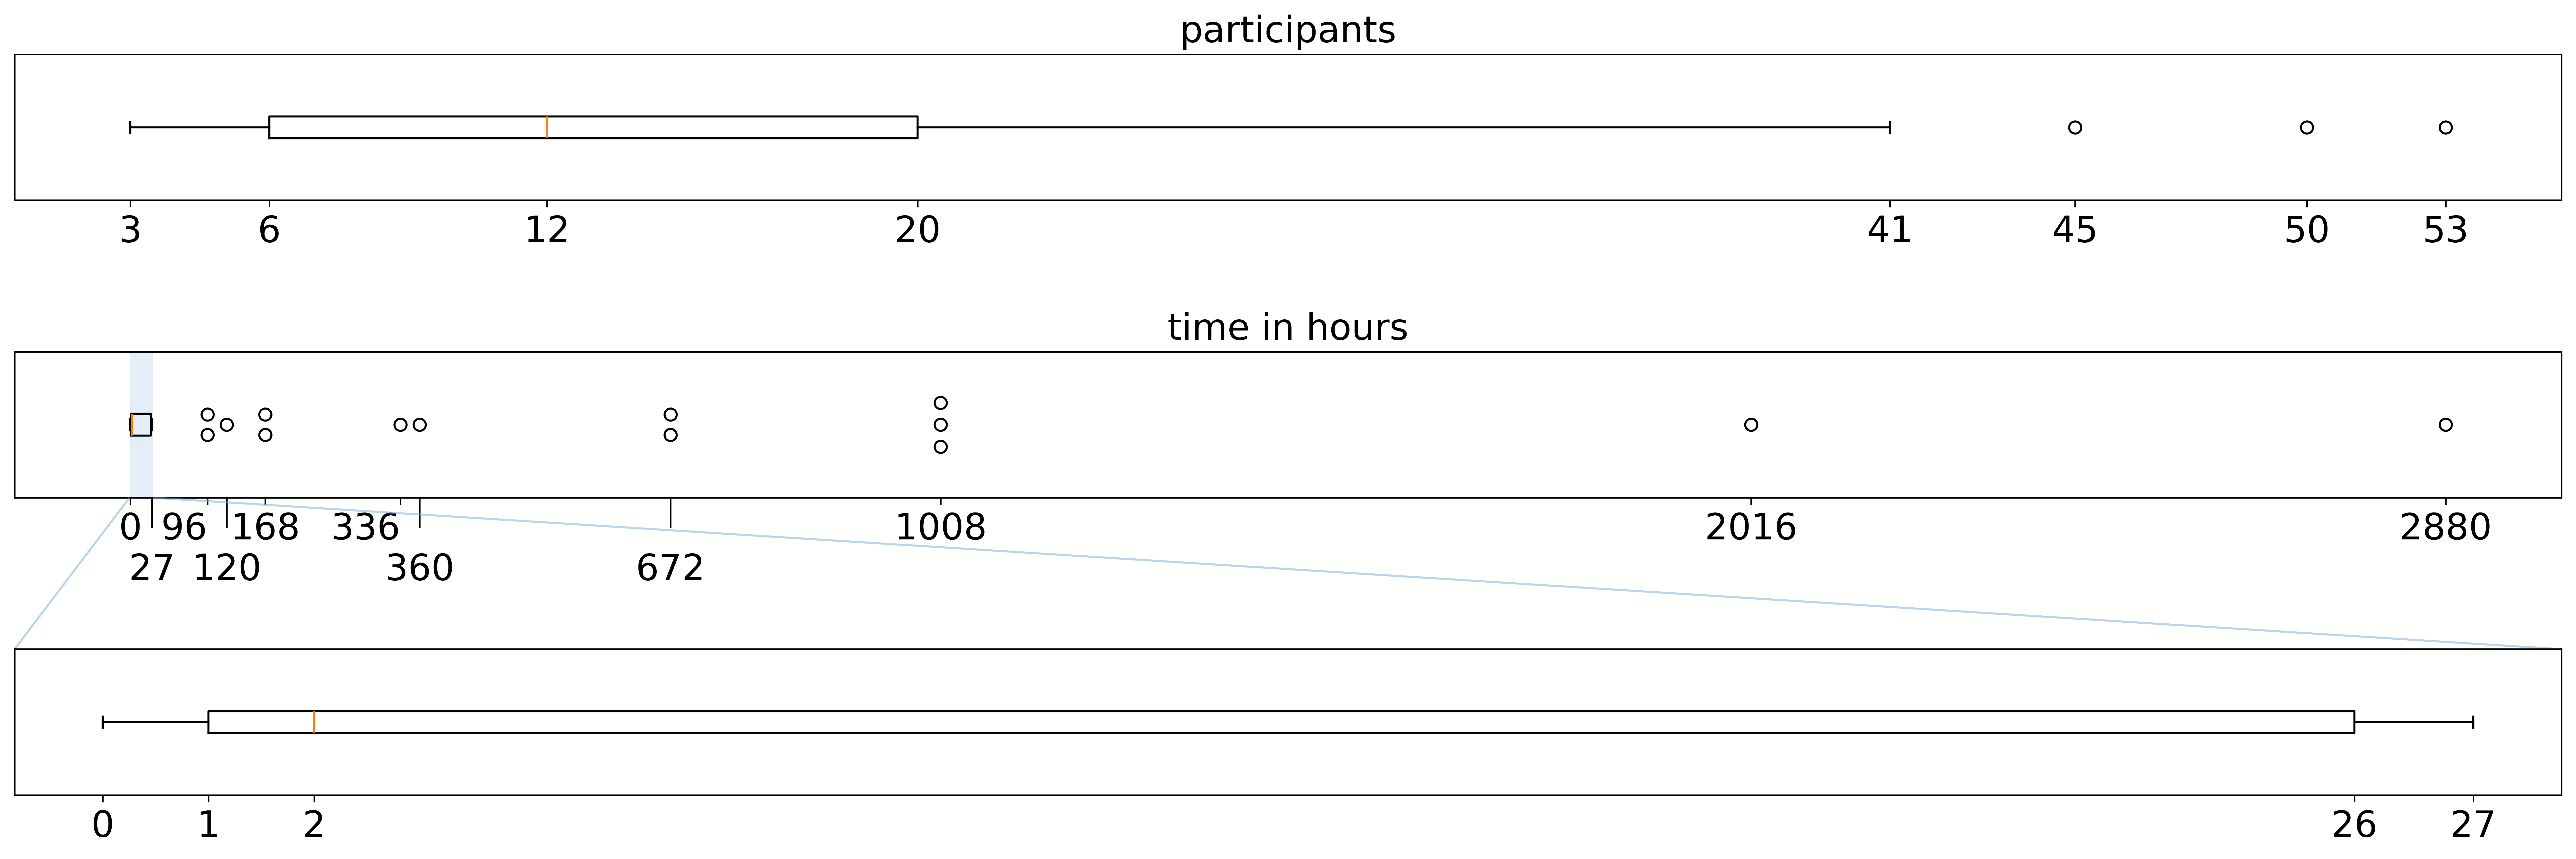

In [5]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(17.7917, 6), dpi=600)
fig.subplots_adjust(wspace=0.01)

##
## Top Plot - Participants
##
p_bp = axs[0].boxplot(df1["Participants"], vert=False)
p_values = [item.get_xdata() for item in p_bp["whiskers"]]
p_fliers = [item.get_xdata() for item in p_bp["fliers"]]
axs[0].set_title("participants", fontsize=18)
axs[0].set_xticks(
    np.unique(
        [
            *p_values[0],
            df1["Participants"].median(),
            *p_values[1],
            df1["Participants"].max(),
            *p_fliers[0],
        ]
    )
)
axs[0].tick_params(axis="both", which="major", labelsize=18)

# Jitter to avoid overlap
p_outliers_to_jitter = list(np.sort(p_fliers[0]))
p_histogram = Counter(p_outliers_to_jitter)
print(p_histogram)
p_outliers_to_jitter = np.unique(
    [d for d in p_outliers_to_jitter if p_histogram[d] > 1]
)
print("p_outliers_to_jitter")
print(p_outliers_to_jitter)

p_indices_to_jitter = list()
for pfj in p_outliers_to_jitter:
    p_indices_to_jitter.append(np.where(p_fliers[0] == pfj)[0])
print("p_indices_to_jitter")
for p_indices in p_indices_to_jitter:
    print(p_indices)

axs[0].yaxis.tick_left()
axs[0].tick_params(labelleft=False)
axs[0].yaxis.set_ticks_position("none")


##
## Middle Plot - Time Overview
##
time_bp = axs[1].boxplot(df1["Time (h)"], vert=False)
t_fliers = [item.get_xdata() for item in time_bp["fliers"]]
t_values = [item.get_xdata() for item in time_bp["whiskers"]]
axs[1].set_title("time in hours", fontsize=18)

# Jitter to avoid overlap
t_outliers_to_jitter = list(np.sort(t_fliers[0]))
t_histogram = Counter(t_outliers_to_jitter)
t_outliers_to_jitter = np.unique(
    [d for d in t_outliers_to_jitter if t_histogram[d] > 1]
)
print("t_outliers_to_jitter")
print(t_outliers_to_jitter)

t_indices_to_jitter = list()
for tfj in t_outliers_to_jitter:
    t_indices_to_jitter.append(np.where(t_fliers[0] == tfj)[0])
print("t_indices_to_jitter")
for t_indices in t_indices_to_jitter:
    print(t_indices)

# Manually jitter outliers
for item in time_bp["fliers"]:
    item.set_ydata([1, 1.07, 1, 1.07, 1, 1, 0.93, 0.93, 1.07, 0.93, 1, 1.15, 1, 0.85])

# Offset some labels downwards
lbls = [1, 3, 6, 7]
labels_formatted = [
    "\n" + str(i) if idx in lbls else str(i)
    for idx, i in enumerate(
        np.unique(
            [0, t_values[1][1], df1["Time (h)"].max(), *np.unique(t_fliers[0][:])]
        )
    )
]

# Cut off trailing .0, but keep non-zero decimal places (e.g., .5)
for idx, i in enumerate(labels_formatted):
    if int(round(float(i), 0)) == float(i):
        labels_formatted[idx] = labels_formatted[idx].replace(".0", "")
print(labels_formatted)
axs[1].set_xticks(
    np.unique([0, t_values[1][1], df1["Time (h)"].max(), *np.unique(t_fliers[0][:])]),
    labels_formatted,
)

for i in lbls:
    axs[1].xaxis.get_major_ticks()[i].tick1line.set_markersize(15)

lbls_shift = [2, 5]
for i in lbls_shift:
    axs[1].xaxis.get_majorticklabels()[i].set_horizontalalignment("right")

# No Y-axis labels
axs[1].yaxis.tick_left()
axs[1].tick_params(labelleft=False)
axs[1].yaxis.set_ticks_position("none")
axs[1].tick_params(axis="both", which="major", labelsize=18)


##
## Bottom Plot, Zoom on Time Boxplot
##
axs[2].boxplot(df1["Time (h)"], vert=False)
axs[2].set_xticks(
    np.unique(
        [*t_values[0], df1["Time (h)"].median(), *t_values[1], df1["Time (h)"].max()]
    )
)
axs[2].set_xlim([df1["Time (h)"].min() - 1, t_values[1][1] + 1])

# No Y-axis labels
axs[2].yaxis.tick_left()
axs[2].tick_params(labelleft=False)
axs[2].yaxis.set_ticks_position("none")
axs[2].tick_params(axis="both", which="major", labelsize=18)

# Zoom to boxplot values with offset one
zoom_effect01(axs[1], axs[2], t_values[1][1] + 1, t_values[0][1] - 1)

plt.tight_layout()
plt.savefig("SP_user_studies.pdf")
plt.savefig("SP_user_studies.png", facecolor="white")
plt.show()